In [23]:
import seaborn as sns
import cmdstanpy as stan
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import pickle

In [2]:
logreg_og = stan.from_csv('inference/logreg/*[1-4].csv')
hier_og = stan.from_csv('inference/hier/*[1-4].csv')
logreg_offset = stan.from_csv('inference_offset_prior/logreg/*[1-4].csv')
hier_offset = stan.from_csv('inference_offset_prior/hier/*[1-4].csv')

In [55]:
colors = sns.color_palette()
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

# Prior viz

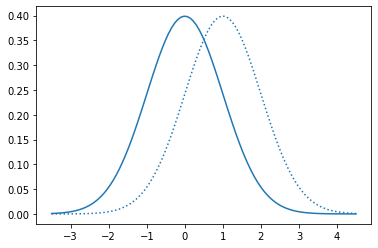

In [36]:
x = np.linspace(-3.5, 4.5, 100)
y_og = stats.norm(0, 1).pdf(x)
y_offset = stats.norm(1, 1).pdf(x)
plt.plot(x, y_og, color=colors[0])
plt.plot(x, y_offset, color=colors[0], linestyle='dotted')

# Beta posteriors logreg

In [56]:
with open('inference/logreg/data.pkl', 'rb') as f:
    logreg_data = pickle.load(f)
with open('inference/hier/data.pkl', 'rb') as f:
    hier_data = pickle.load(f)
betas_og = logreg_og.stan_variable('beta')
betas_offset = logreg_offset.stan_variable('beta')

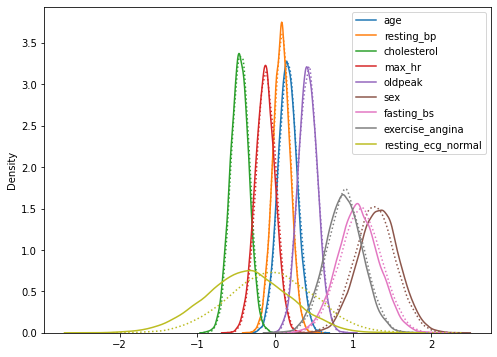

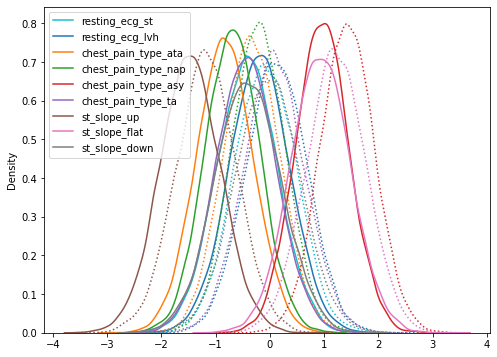

In [50]:
col_names = logreg_data['X'].columns
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(9):
    sns.kdeplot(betas_og[:, i], color=colors[i%10], label=col_names[i])
    sns.kdeplot(betas_offset[:, i], color=colors[i%10], linestyle='dotted')

plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(8, 6))
for i in range(9, 18):
    sns.kdeplot(betas_og[:, i], color=colors[i%10], label=col_names[i])
    sns.kdeplot(betas_offset[:, i], color=colors[i%10], linestyle='dotted')
plt.legend()
plt.show()

# Beta posterior hier

Summattuna hierarkian yli, siksi näyttää noin hupsuilta

In [57]:
betas_og = hier_og.stan_variable('beta')
betas_offset = hier_offset.stan_variable('beta')

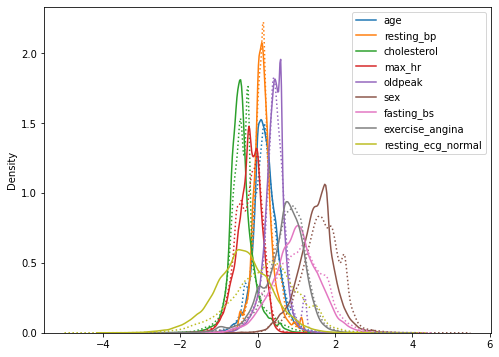

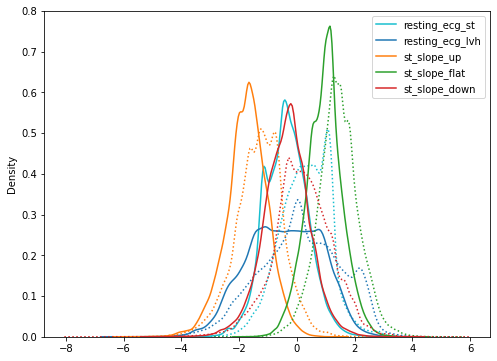

In [65]:
col_names = hier_data['X'].columns
colors = sns.color_palette()
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(9):
    sns.kdeplot(betas_og[:, :, i].reshape(-1), color=colors[i%10], label=col_names[i])
    sns.kdeplot(betas_offset[:, :, i].reshape(-1), color=colors[i%10], linestyle='dotted')

plt.legend()
plt.show()

colors = sns.color_palette()
fig, ax = plt.subplots(figsize=(8, 6))
for i in range(9, 14):
    sns.kdeplot(betas_og[:, :, i].reshape(-1), color=colors[i%10], label=col_names[i])
    sns.kdeplot(betas_offset[:, :, i].reshape(-1), color=colors[i%10], linestyle='dotted')
plt.legend()
plt.show()